# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Custom imports (i.e. own scripts)

In [2]:
"""

If you use this ipython notebook outside its original directory
please set the path to the COMPAS repository and uncomment the lines below
this way it automatically finds the custom scripts that we need to import

"""
#pathCOMPASrepo       = '/home/cneijssel/Documents/COMPASpop/'
#pathToPostProcessing = 'popsynth/Papers/NeijsselEtAl/PostProcessing/2_CosmicIntegration/
#import sys
#sys.path.append('athCOMPASrepo+pathToPostProcessing)

#The script we use to create the figure in this notebook
import Intro  

# The main goal of the paper.

The physics of double compact object (DCO) formation from isolated binary evolution depends on metallicity.
The metallicity affects wind mass loss rates and expansion etc. and hence the stars and their remnants.
To get a certain population of massive stellar binaries you need a specific amount of star formation.

Both the star formation rate (SFR) and the metallicity distribution change over cosmic timescales.
For this reason you expect the DCO population to change as a function of redshift.
However the exact distributions of SFR and metallicity are not certain.


The change in SFR affects our rate estimation of certain events, in this case focussed on
the formation of DCOs. For the basics when we assume all star formation goes into a simulation with a given metallicity. 


<a href="./1_RatePerUnitSolarMass/1_RatePerSolarMass.html">
1 - concept of rate per unit solar mass
</a>


Now we have a population from a range of metallicities. The amount of SFR that goes into each metallicity
,i.e  the metallicity specific star formation rate (MSSFR) changes. So we need to reweight each population at each metallicity individually. This study and collection of notes is aimed at understanding how much a difference in these assumptinos affect our rate estimates of DCO mergers and populations we observe with current and future gravitational wave detectors.


The main steps:

- parametrize the metallicity specific star formation rate (MSSFR) as a function of redshift
- reweight the population of DCO mergers
- analyze its effect on the redshift dependent DCO merger distribution and the observed DCO mergers


The first steps are more technical in nature and it might be more intuitive to start with
the last steps in our method to see the bigger picture first.



Our computational resources are only finite, hence we cannot  analyse the DCO mergers
as a continuous function of redshift. Instead we divide our local volume into concentric shells
center around a redshift (z). We then try to estimate the DCO merger rate density (dN dyr-1 dGpc-3)
at each shell with a certain volume. We can further bin/divide this population to investigate their distributions such as masses, mass ratios etc.


For the observed distribution by a detector we then need to apply a selection effect which is mass and distant dependent. A detector does not look at a single redshift and hence we need to sum up the contributions of all shells.

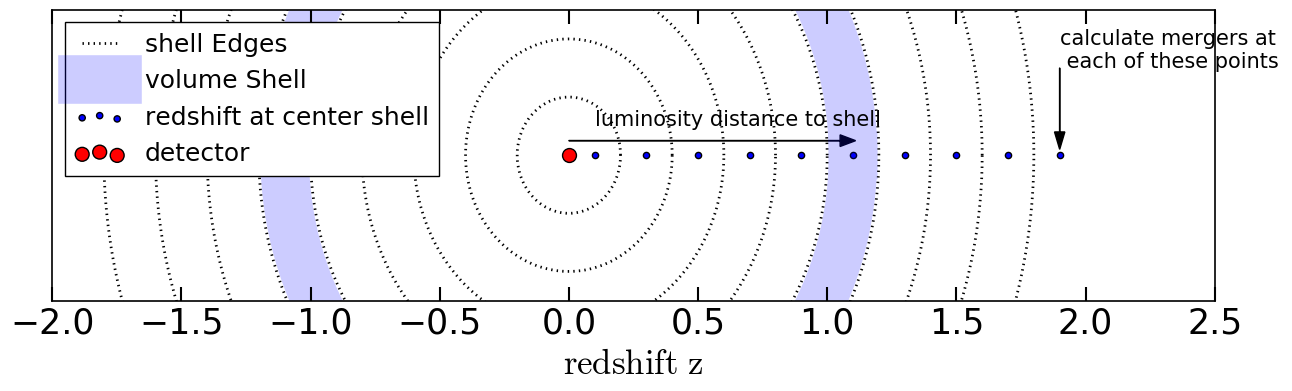

In [3]:
Intro.drawConcentricFigure()

# The DCO merger distribution at a redshift

To get a distribution of DCOs we use the COMPAS population synthesis suite.

Important assumption:

We assume that the initial distributions for massive stellar binaries (masses, separations and eccentricities)
are redshift independent.




To get a merger distribution in a single redshift cell there are two methods of using the COMPAS population.

Option 1.
Place the birth of a population at each redshift (can do this because of the assumption). 
The different delay times per system means you get a scatter of merger times from different populations
and different systems across the redshifts. If you bin the systems with mergers in a redshift shell you have your population ar a single redshift. Benefit you only have to weight the system by a few possible. Downside DCO mergers
might not merge within a redshift shell (loss population info due to binning)

Option 2.
Assume the entire population merges at a given redshift z. Then for each individual system look up its time of birth and reweight it accordingly. Benefit we use the entire DCO population. Downside we need to 
do the reweighting per individual binary.


Given that the reweightin per individual binary can be done relatively efficient we opt for option 2.
The main benefit is that our merger distribution at a given redshift is complete, as in it uses all the info of our entire DCO population. This does mean we need a routine to reweight each individual system




# Reweighting each individual DCO merger

To form massive stellar binaries you need star formation to happen.
The COMPAS simulation tells us how much solar mass we evolved in all stars within the limits of our simulation.
Hence from that we recover a rate for a individual system

$$\rm R_{COMPAS}\ [\frac{dN}{dM_{\odot}}] = \frac{1}{M_{\odot} \ in\ evolved \ COMPAS} $$


However COMPAS might not have evolved all possible star formation rate.
Thus we need a correction factor for the true amount of solar mass evolved in all stars
To get this correction factor $f_{M_{\odot}, true}$ see


<a href="./1_RatePerUnitSolarMass/1_RatePerSolarMass.html">
1 - concept of rate per unit solar mass
</a>

$$\rm R \ [\frac{dN}{dM_{\odot}}] = \frac{1}{M_{\odot} \ in\ evolved \ COMPAS} f_{M_{\odot}, true} $$


Then we need to know the star formation rate (SFR) at its birth per year per volume
to get the merger rate of this system epr year per volume.

$$\rm R \ [\frac{dN}{dyr dGpc^3}] = \frac{1}{M_{\odot} \ in\ evolved \ COMPAS} f_{M_{\odot}, true} SFR(Z,z) $$


However the SFR at its birth depends on the merger time we assume.

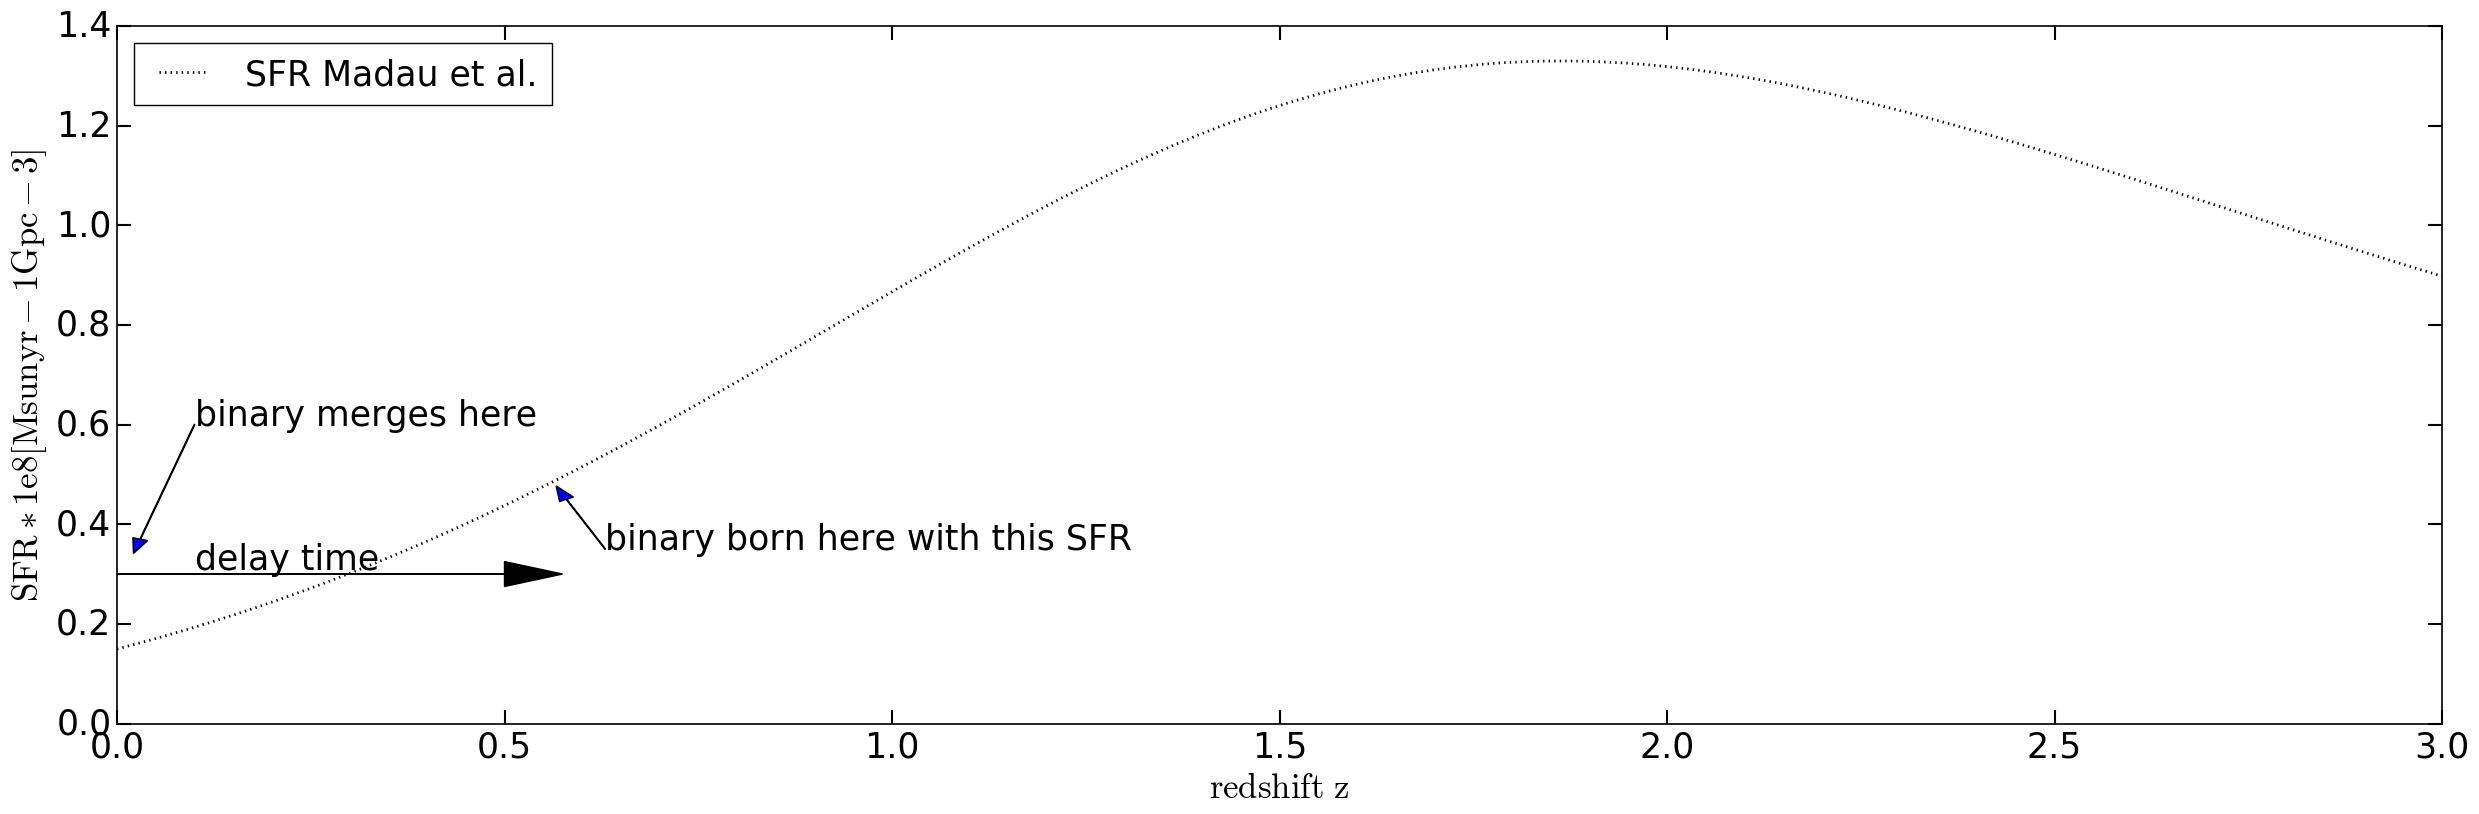

In [4]:
Intro.drawingConcept(0, 0)

In the above the system mergers at redshift zero. We then use the delay time to know the redshift/age of the universe at its birth. Then we can use the SFR prescription to see what get the amount of $M_{\odot} / yr^{-1} / Gpc^{-3}$.

Remember that this system also comes from a metallicity. Given that we have a finite number of metallicities in our simulation, this metallicity Z represents an interval dZ.

Therefore we use another set of prescriptions to give us the fraction of the total SFR in that metallicity bin.
Exlpained in more detail later.

<a href="./1_RatePerUnitSolarMass/1_RatePerSolarMass.html">
1 - concept of rate per unit solar mass
</a>


The above step we do for every system that merges at redshift zero. Alltogether this gives us our total DCO merger
distribution at redshift zero.



When we want to evaluate the merger distribution at redshift 1.5 we do the same trick but shift our system as shown below

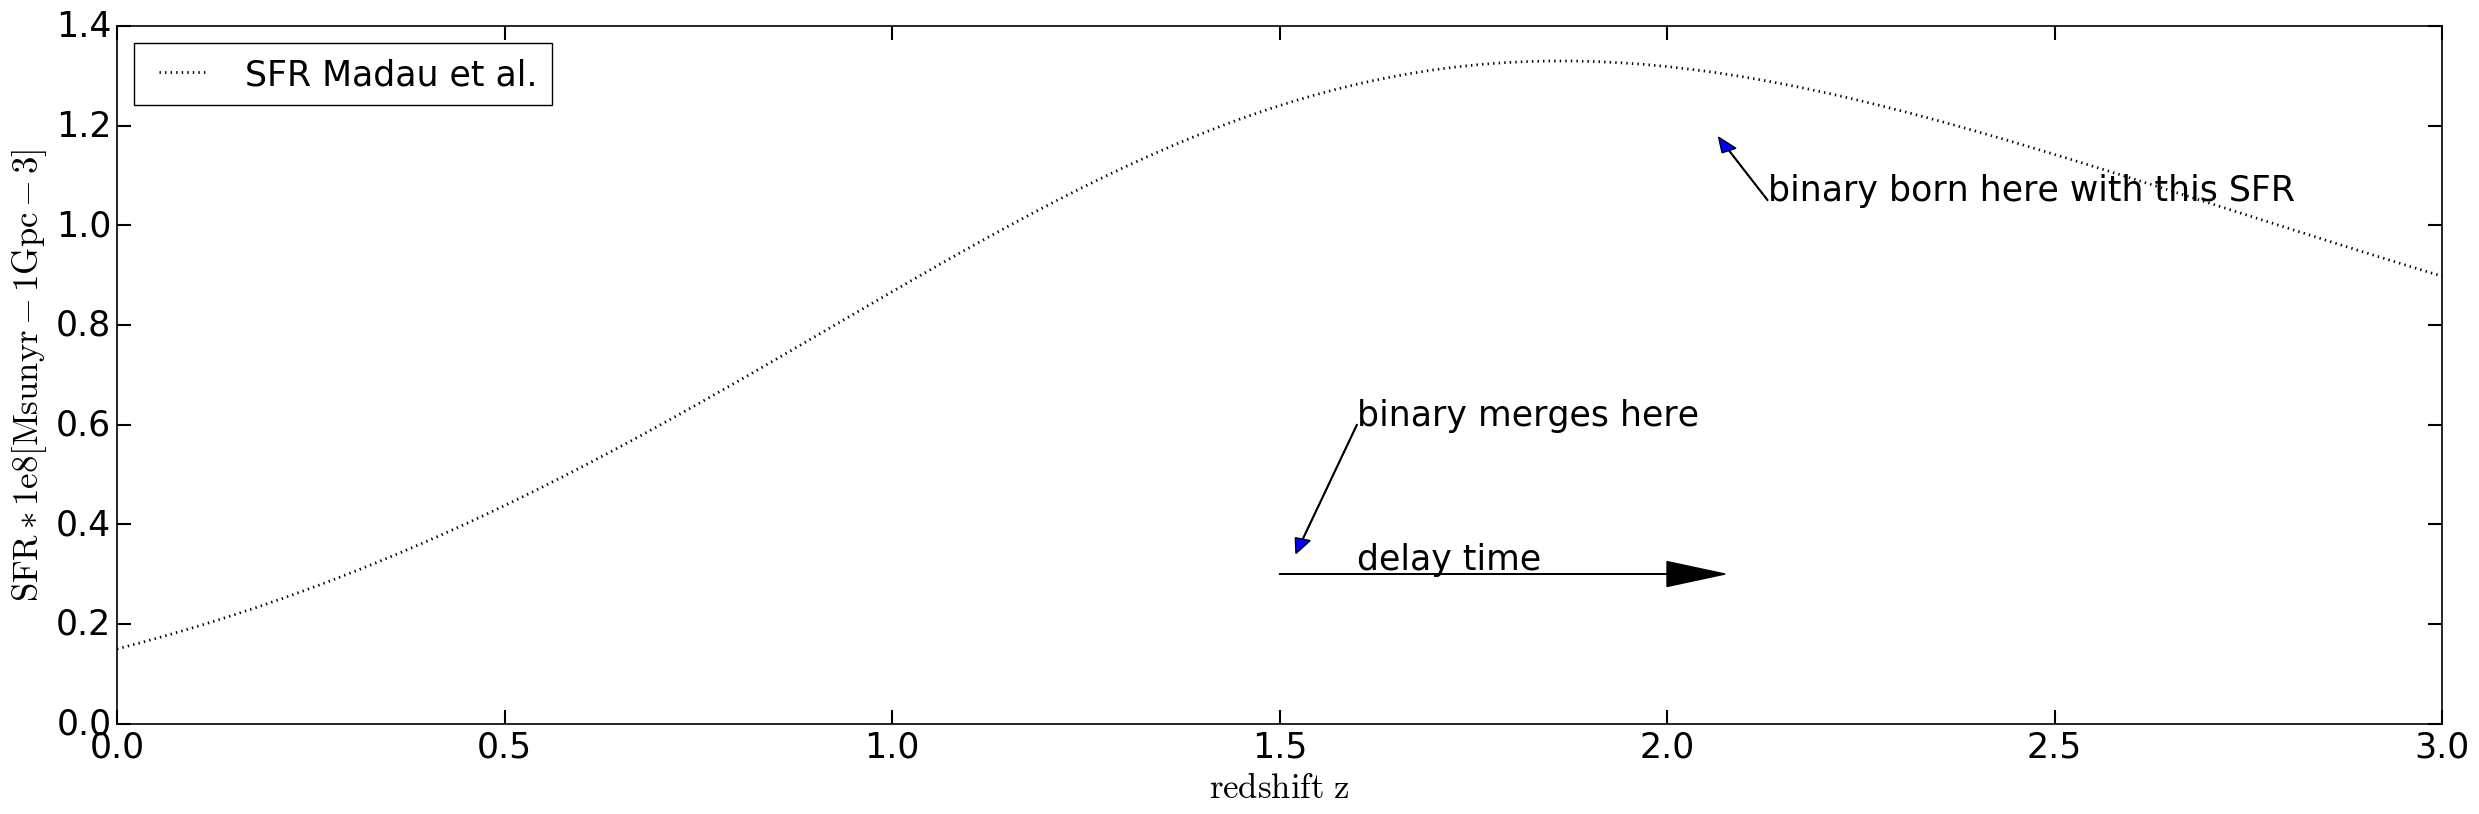

In [5]:
Intro.drawingConcept(1.5,0.7)

This gives us a the merger rate density as a function of redshift. 
If we multiply each distribution in a shell by the volume of that shell we get the absolute rate of mergers.
We then need to 

- redshift the rate in the source frame to the rate in the observer frame (1/(1+z))
- apply the selection effect of the GW detector on each system in the shell depending on the masses and distance of the shell
- add up the contributions of all shells

This gives us our observed distribution of GW events.

# MSSFR uncertainty

The above routine we do for different MSSFR prescriptions.
This results in possibly different rate and mass distributions of the predicted GW-events for a detector.

https://arxiv.org/pdf/1906.08136.pdf

# The main code created for this project in

For this reason we need to create the following post processing routines

- Get the needed info from the COMPAS simulation (ClassCOMPAS)



- Parametrization of the MSSFR   (ClassMSSFR)

- Integration of the population in shells and weight by MSSFR (ClassCosmicIntegrator)


- Recover the true amount of solar mass evolved (totalMassEvolved) 
  Note that although the principle is the same, 
  
  the totalMassEvolvedScript
  in the cosmic integration is slightly different than the one presented in 
  
    <a href="./1_RatePerUnitSolarMass/1_RatePerSolarMass.html">
    1 - concept of rate per unit solar mass
    </a>

   This is to make it a more self-consistent pipeline


- For the selection effects  used a routine from Sebastian Gaebel (selection_effects)
